In [3]:
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

C:\Users\Vonej\AppData\Local\Temp/ipykernel_7404/265456824.py:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  brick_grayscale = color.rgb2gray(brick_img)


Text(0.5, 1.0, 'Initial image (512x512)')

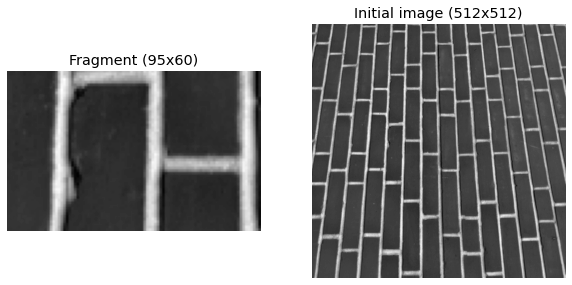

In [46]:
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte, img_as_bool, img_as_float
from skimage.exposure import histogram
from skimage import data
import skimage.color as color
import skimage.io as io
import numpy as np
import skimage.util as ut

brick_img = data.brick()
brick_grayscale = color.rgb2gray(brick_img)

fig, ax = plt.subplots(ncols=2, figsize=(10, 8))
brick_cropped = ut.crop(brick_grayscale, ((200 ,252),(130 ,287)))

ax[0].imshow(brick_cropped, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title(f'Fragment ({len(brick_cropped[0])}x{len(brick_cropped)})')

ax[1].imshow(brick_grayscale, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title(f'Initial image ({len(brick_grayscale[0])}x{len(brick_grayscale)})')


Text(0.5, 1.0, 'Fragment rotated')

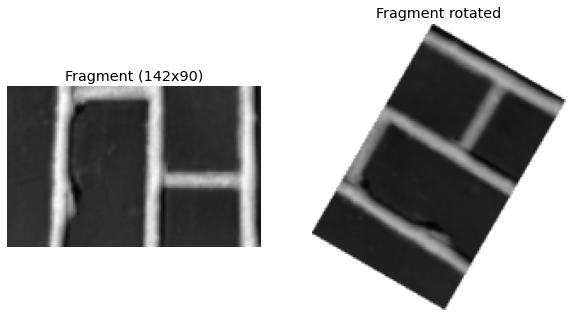

In [17]:
import skimage.transform as transform

frag_scaled = transform.rescale(brick_cropped,1.5)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(frag_scaled, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title(f'Fragment ({len(frag_scaled[0])}x{len(frag_scaled)})')

frag_scaled_rotated = transform.rotate(frag_scaled, 60, cval=1, mode ='constant', resize=True)

ax[1].imshow(frag_scaled_rotated, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title(f'Fragment rotated')


Text(0.5, 1.0, 'Fragment rotated')

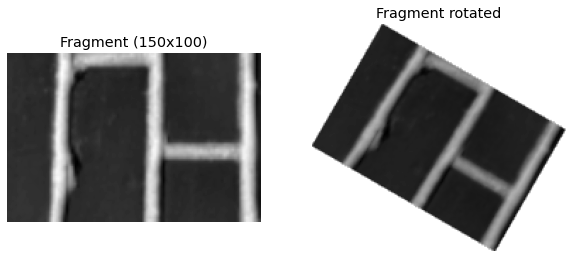

In [18]:
import skimage.transform as transform

frag_scaled = transform.resize(brick_cropped, (100,150))

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(frag_scaled, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title(f'Fragment ({len(frag_scaled[0])}x{len(frag_scaled)})')

frag_scaled_rotated = transform.rotate(frag_scaled, -30, cval=1, mode ='constant', resize=True)

ax[1].imshow(frag_scaled_rotated, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title(f'Fragment rotated')


# Sobel operator

#### $\begin{pmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{pmatrix} -horizontal$
#### $\begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix} -vertical$

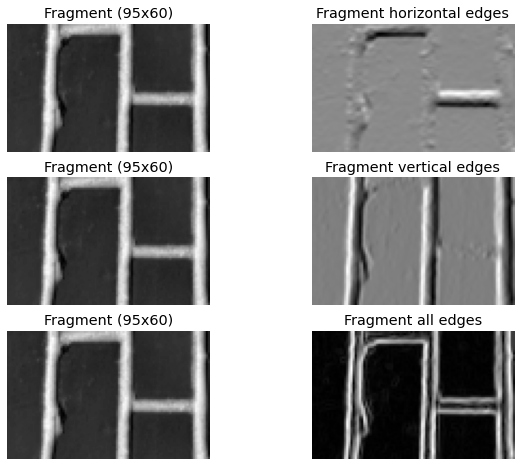

In [72]:
from skimage import filters

fragment = brick_cropped

edges = filters.sobel(fragment)
edges_horizontal = filters.sobel_h(fragment)
edges_vertical = filters.sobel_v(fragment)

images = [edges_horizontal, edges_vertical, edges]
filt_names = ['horizontal', 'vertical', 'all']

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10, 8))

for i, img in enumerate(images):
    ax[i][0].imshow(fragment, cmap=plt.cm.gray)
    ax[i][0].axis('off')
    ax[i][0].set_title(f'Fragment ({len(fragment[0])}x{len(fragment)})')
    ax[i][1].imshow(img, cmap=plt.cm.gray)
    ax[i][1].axis('off')
    ax[i][1].set_title(f'Fragment {filt_names[i]} edges')

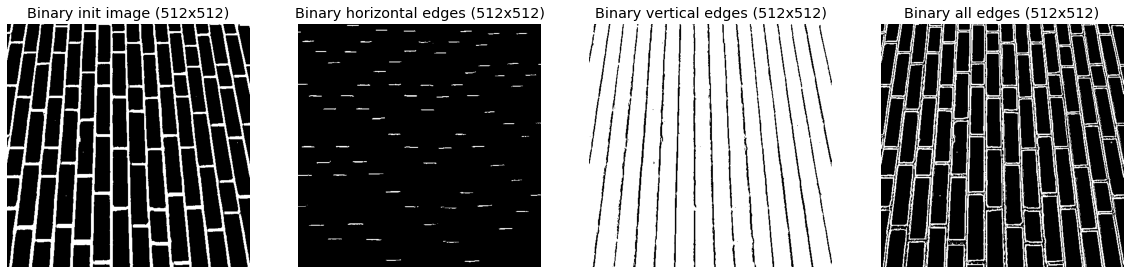

In [61]:
edges_horizontal = filters.sobel_h(brick_grayscale)
edges_vertical = filters.sobel_v(brick_grayscale)
edges = np.abs(edges_horizontal)+np.abs(edges_vertical)

init_images = [brick_grayscale, edges_horizontal, edges_vertical, edges]
bin_images = [img > filters.threshold_minimum(img) for img in init_images]
img_names = ['init image', 'horizontal edges', 'vertical edges', 'all edges']
fig, axs = plt.subplots(ncols=4, figsize=(20, 20))

for name, img, ax in zip(img_names, bin_images, axs):
    ax.imshow(img, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(f'Binary {name} ({len(img[0])}x{len(img)})')

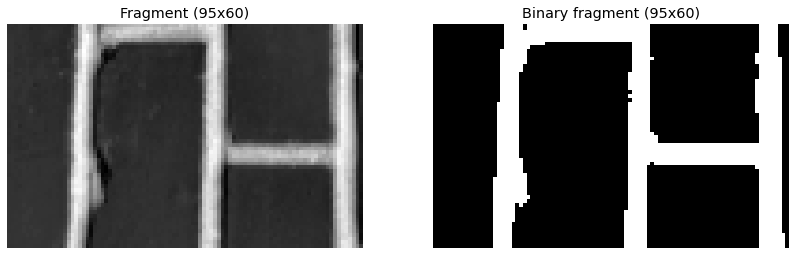

In [74]:
images = [fragment, fragment > filters.threshold_minimum(fragment)]
img_names = ['Fragment','Binary fragment']
fig, axs = plt.subplots(ncols=2, figsize=(14, 8))

for name, img, ax in zip(img_names, images, axs):
    ax.imshow(img, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(f'{name} ({len(img[0])}x{len(img)})')

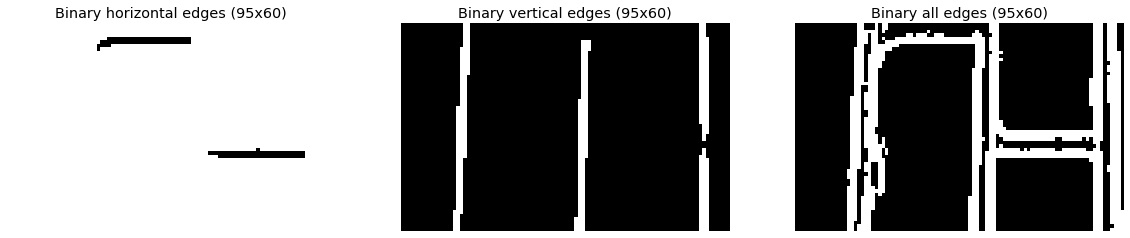

In [76]:
edges_horizontal = filters.sobel_h(fragment)
edges_vertical = filters.sobel_v(fragment)
edges = np.abs(edges_horizontal)+np.abs(edges_vertical)

init_images = [edges_horizontal, edges_vertical, edges]
bin_images = [img > filters.threshold_minimum(img) for img in init_images]
img_names = ['horizontal edges', 'vertical edges', 'all edges']
fig, axs = plt.subplots(ncols=3, figsize=(20, 20))

for name, img, ax in zip(img_names, bin_images, axs):
    ax.imshow(img, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(f'Binary {name} ({len(img[0])}x{len(img)})')

In [ ]:
plot_img_formats(brick_img, ['float', 'grayscale'])